# **Image-to-Image**

In [1]:
!pip install transformers

In [2]:
from transformers import pipeline
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-to-image", model="caidas/swin2SR-lightweight-x2-64", device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.18M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

In [3]:
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"
image = Image.open(requests.get(url, stream=True).raw)

print(image.size)

(532, 432)


In [4]:
upscaled = pipe(image)
print(upscaled.size)

(1072, 880)


In [5]:
from transformers import Swin2SRForImageSuperResolution, Swin2SRImageProcessor

model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-lightweight-x2-64").to(device)
processor = Swin2SRImageProcessor("caidas/swin2SR-lightweight-x2-64")

In [6]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

pixel_values = pixel_values.to(device)

torch.Size([1, 3, 440, 536])


In [7]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

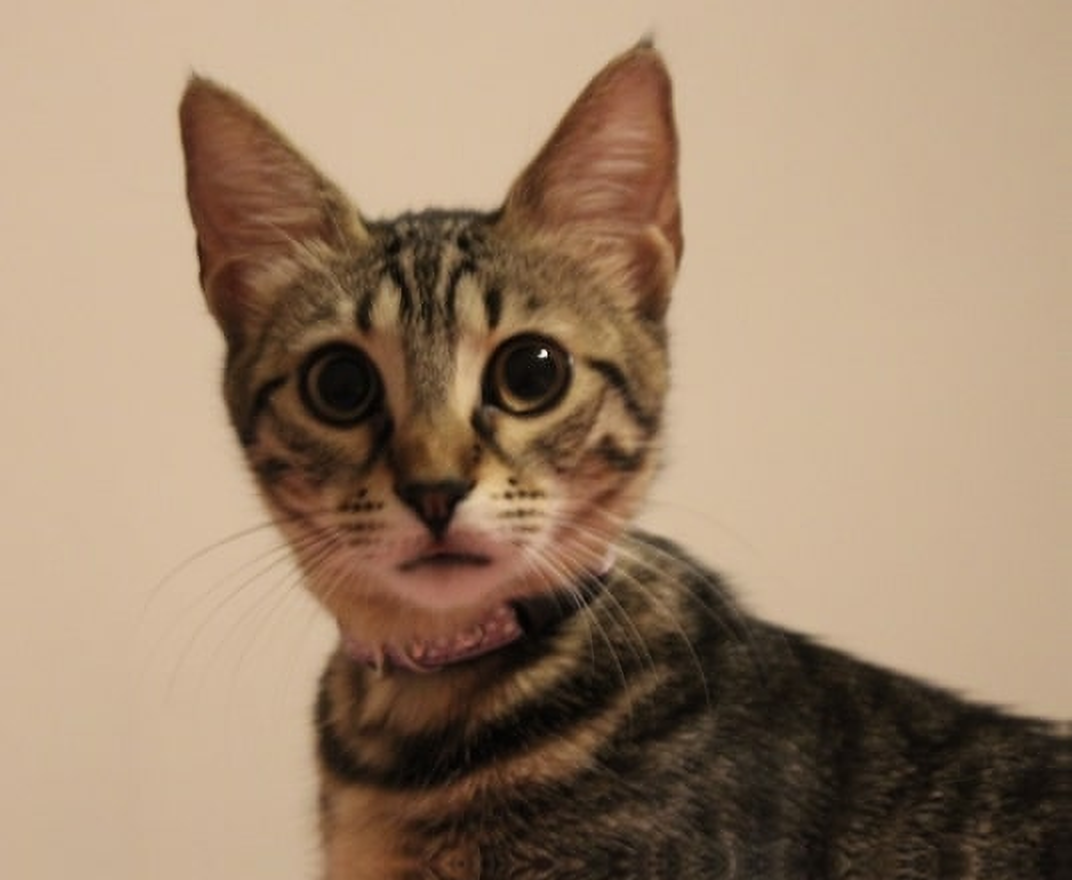

In [8]:
import numpy as np

output = outputs.reconstruction.data.squeeze().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)
Image.fromarray(output)